In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./SportsPersonClassifier/model/testimg/dhoni.jpg');
img.shape

(450, 600, 3)

In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


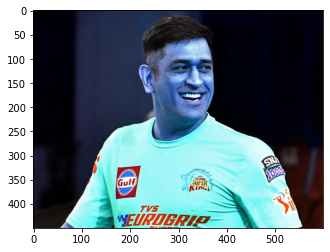

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
gray.shape

(450, 600)

In [6]:
gray

array([[ 3,  3,  3, ...,  6,  6,  7],
       [ 3,  3,  3, ...,  6,  6,  7],
       [ 3,  3,  3, ...,  6,  6,  7],
       ...,
       [22, 22, 22, ..., 25, 26, 27],
       [23, 24, 24, ..., 26, 25, 27],
       [23, 24, 24, ..., 25, 25, 27]], dtype=uint8)

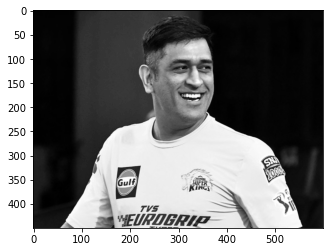

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./SportsPersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./SportsPersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[254,  59, 152, 152]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(254, 59, 152, 152)

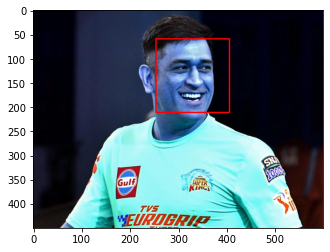

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

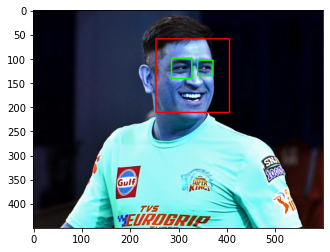

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

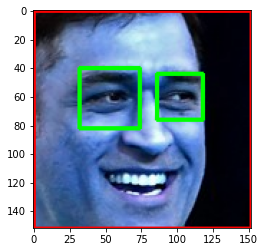

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')  

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x :x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

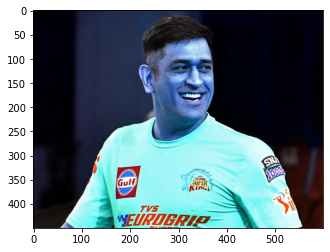

In [14]:
original_image = cv2.imread('./SportsPersonClassifier/model/testimg/dhoni.jpg')
plt.imshow(original_image)

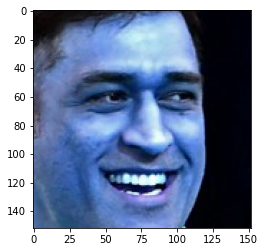

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./SportsPersonClassifier/model/testimg/dhoni.jpg')
plt.imshow(cropped_image)

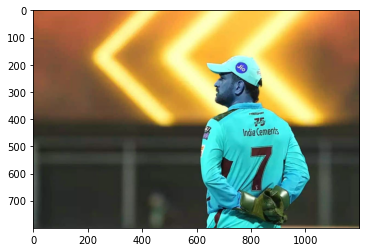

In [16]:
original_image = cv2.imread('./SportsPersonClassifier/model/testimg/dhoni2.jpg')
plt.imshow(original_image)

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./SportsPersonClassifier/model/testimg/dhoni2.jpg')
cropped_image_no_2_eyes

In [18]:
path_to_data = "./SportsPersonClassifier/model/dataset/"
path_to_cr_data = "./SportsPersonClassifier/model/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./SportsPersonClassifier/model/dataset/bumrah',
 './SportsPersonClassifier/model/dataset/harbhajan',
 './SportsPersonClassifier/model/dataset/hardik_pandya',
 './SportsPersonClassifier/model/dataset/kapil_dev',
 './SportsPersonClassifier/model/dataset/ms_dhoni',
 './SportsPersonClassifier/model/dataset/ravindra_jadeja',
 './SportsPersonClassifier/model/dataset/shikhar_dhawan',
 './SportsPersonClassifier/model/dataset/suresh_raina',
 './SportsPersonClassifier/model/dataset/virat_kohli',
 './SportsPersonClassifier/model/dataset/yuzvendra_chahal']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.path is not None:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/bumrah
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/harbhajan
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/hardik_pandya
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/kapil_dev
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/ms_dhoni
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/ravindra_jadeja
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/shikhar_dhawan
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/suresh_raina
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/virat_kohli
Generating cropped images in folder:  ./SportsPersonClassifier/model/cropped/yuzvendra_chahal


In [23]:
cropped_image_dirs = ["./SportsPersonClassifier/model/cropped/bumrah","./SportsPersonClassifier/model/cropped/harbhajan"
,"./SportsPersonClassifier/model/cropped/hardik_pandya","./SportsPersonClassifier/model/cropped/kapil_dev",
"./SportsPersonClassifier/model/cropped/ms_dhoni",
"./SportsPersonClassifier/model/cropped/ravindra_jadeja","./SportsPersonClassifier/model/cropped/shikhar_dhawan",
"./SportsPersonClassifier/model/cropped/suresh_raina",
"./SportsPersonClassifier/model/cropped/virat_kohli",
"./SportsPersonClassifier/model/cropped/yuzvendra_chahal"]

In [24]:
cropped_image_dirs

['./SportsPersonClassifier/model/cropped/bumrah',
 './SportsPersonClassifier/model/cropped/harbhajan',
 './SportsPersonClassifier/model/cropped/hardik_pandya',
 './SportsPersonClassifier/model/cropped/kapil_dev',
 './SportsPersonClassifier/model/cropped/ms_dhoni',
 './SportsPersonClassifier/model/cropped/ravindra_jadeja',
 './SportsPersonClassifier/model/cropped/shikhar_dhawan',
 './SportsPersonClassifier/model/cropped/suresh_raina',
 './SportsPersonClassifier/model/cropped/virat_kohli',
 './SportsPersonClassifier/model/cropped/yuzvendra_chahal']

In [25]:
# Manually examine cropped folder and delete any unwanted images
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bumrah': ['./SportsPersonClassifier/model/cropped/bumrah\\bumrah1.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah10.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah101.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah103.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah106.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah11.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah112.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah115.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah116.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah119.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah12.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah124.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah125.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah128.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah13.png',
  './S

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

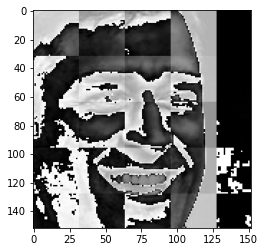

In [27]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
celebrity_file_names_dict

{'bumrah': ['./SportsPersonClassifier/model/cropped/bumrah\\bumrah1.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah10.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah101.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah103.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah106.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah11.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah112.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah115.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah116.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah119.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah12.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah124.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah125.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah128.png',
  './SportsPersonClassifier/model/cropped/bumrah\\bumrah13.png',
  './S

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bumrah': 0,
 'harbhajan': 1,
 'hardik_pandya': 2,
 'kapil_dev': 3,
 'ms_dhoni': 4,
 'ravindra_jadeja': 5,
 'shikhar_dhawan': 6,
 'suresh_raina': 7,
 'virat_kohli': 8,
 'yuzvendra_chahal': 9}

In [30]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [31]:
len(X)

703

In [32]:
len(X[0])

4096

In [33]:
X[0]

array([[249],
       [235],
       [213],
       ...,
       [ 28],
       [246],
       [ 13]], dtype=uint8)

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(703, 4096)

In [35]:
X[0]

array([249., 235., 213., ...,  28., 246.,  13.])

In [36]:
### Model Training

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7613636363636364

In [39]:
len(X_test)

176

In [40]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.80      0.86      0.83        14
           2       0.62      0.83      0.71        12
           3       0.86      0.98      0.92        51
           4       0.64      0.88      0.74         8
           5       0.57      0.24      0.33        17
           6       0.80      0.57      0.67        14
           7       0.67      0.73      0.70        11
           8       0.43      0.55      0.48        11
           9       1.00      0.71      0.83        17

    accuracy                           0.76       176
   macro avg       0.72      0.71      0.70       176
weighted avg       0.77      0.76      0.75       176



In [42]:
#grid search

In [43]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [45]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.806559,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.537053,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.793118,{'logisticregression__C': 1}


In [46]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [47]:
best_estimators['svm'].score(X_test,y_test)

0.8295454545454546

In [48]:
best_estimators['random_forest'].score(X_test,y_test)

0.6136363636363636

In [49]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8238636363636364

In [50]:
best_clf = best_estimators['svm']

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[17,  1,  0,  1,  0,  2,  0,  0,  0,  0],
       [ 0, 13,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0],
       [ 3,  0,  2,  2,  0,  9,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  1,  0,  9,  2,  1,  0],
       [ 0,  0,  0,  1,  0,  1,  1,  8,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  2,  1,  6,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0, 14]], dtype=int64)

Text(69.0, 0.5, 'Truth')

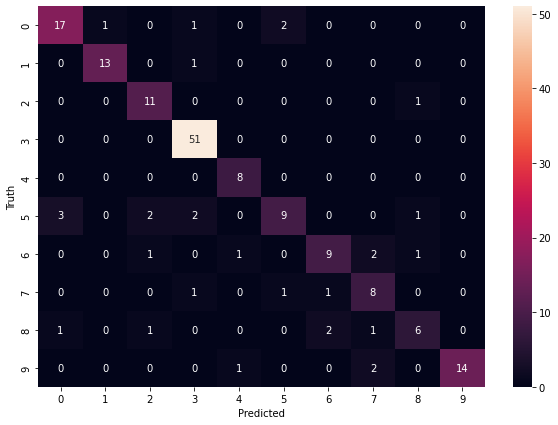

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
class_dict

{'bumrah': 0,
 'harbhajan': 1,
 'hardik_pandya': 2,
 'kapil_dev': 3,
 'ms_dhoni': 4,
 'ravindra_jadeja': 5,
 'shikhar_dhawan': 6,
 'suresh_raina': 7,
 'virat_kohli': 8,
 'yuzvendra_chahal': 9}

In [53]:
### Trained Model

In [55]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [56]:
### Save Class Dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))